In [10]:
import os
import re
import json
import csv
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
import os
import re
import json
from pathlib import Path

BASE_DIR = Path("data/lm_eval_results")
OUTPUT_DIR = Path("datasets")
OUTPUT_DIR.mkdir(exist_ok=True)

pattern = re.compile(r"samples_(.*?)_\d")

for model_dir in BASE_DIR.iterdir():
    if not model_dir.is_dir():
        continue
    
    for jsonl_file in model_dir.glob("*.jsonl"):
        filename = jsonl_file.name
        match = pattern.match(filename)
        if not match:
            print(f"Skipping file (doesn't match pattern): {filename}")
            continue

        dataset_name = match.group(1)
        out_path = OUTPUT_DIR / f"{dataset_name}.jsonl"

        model_name = model_dir.name

        with open(jsonl_file, "r", encoding="utf-8") as in_f, \
             open(out_path, "a", encoding="utf-8") as out_f:
            
            for line in in_f:
                data = json.loads(line)
                data["model_name"] = model_name

                out_f.write(json.dumps(data) + "\n")

        print(f"Appended {jsonl_file} -> {out_path}")

Appended data/lm_eval_results/meta-llama__Llama-3.2-3B-Instruct/samples_mmlu_college_biology_2024-12-29T14-34-19.612445.jsonl -> datasets/mmlu_college_biology.jsonl
Appended data/lm_eval_results/meta-llama__Llama-3.2-3B-Instruct/samples_mmlu_international_law_2024-12-29T14-34-19.612445.jsonl -> datasets/mmlu_international_law.jsonl
Appended data/lm_eval_results/meta-llama__Llama-3.2-3B-Instruct/samples_mmlu_conceptual_physics_2024-12-29T14-34-19.612445.jsonl -> datasets/mmlu_conceptual_physics.jsonl
Appended data/lm_eval_results/meta-llama__Llama-3.2-3B-Instruct/samples_mmlu_moral_disputes_2024-12-29T14-34-19.612445.jsonl -> datasets/mmlu_moral_disputes.jsonl
Appended data/lm_eval_results/meta-llama__Llama-3.2-3B-Instruct/samples_mmlu_astronomy_2024-12-29T14-34-19.612445.jsonl -> datasets/mmlu_astronomy.jsonl
Appended data/lm_eval_results/meta-llama__Llama-3.2-3B-Instruct/samples_mmlu_machine_learning_2024-12-29T14-34-19.612445.jsonl -> datasets/mmlu_machine_learning.jsonl
Appended dat

In [3]:
def jsonl_to_csv(jsonl_path, csv_path):
    """
    Read a .jsonl file, gather all keys from all lines,
    and write out a CSV with those columns.
    """
    rows = []
    all_keys = set()

    with open(jsonl_path, 'r', encoding='utf-8') as f:
        for line in f:
            line = line.strip()
            if not line:
                continue
            data = json.loads(line)
            rows.append(data)
            all_keys.update(data.keys())

    with open(csv_path, 'w', newline='', encoding='utf-8') as out_f:
        writer = csv.DictWriter(out_f, fieldnames=sorted(all_keys))
        writer.writeheader()
        for row in rows:
            writer.writerow(row)

In [4]:
jsonl_dir = OUTPUT_DIR

for jsonl_file in jsonl_dir.glob("*.jsonl"):
    dataset_name = jsonl_file.stem 
    csv_file = jsonl_dir / f"{dataset_name}.csv"

    print(f"Converting {jsonl_file} -> {csv_file} ...")
    jsonl_to_csv(jsonl_file, csv_file)
    print(f"Saved {csv_file}")

Converting datasets/mmlu_college_computer_science.jsonl -> datasets/mmlu_college_computer_science.csv ...
Saved datasets/mmlu_college_computer_science.csv
Converting datasets/mmlu_college_medicine.jsonl -> datasets/mmlu_college_medicine.csv ...
Saved datasets/mmlu_college_medicine.csv
Converting datasets/mmlu_philosophy.jsonl -> datasets/mmlu_philosophy.csv ...
Saved datasets/mmlu_philosophy.csv
Converting datasets/mmlu_high_school_physics.jsonl -> datasets/mmlu_high_school_physics.csv ...
Saved datasets/mmlu_high_school_physics.csv
Converting datasets/mmlu_abstract_algebra.jsonl -> datasets/mmlu_abstract_algebra.csv ...
Saved datasets/mmlu_abstract_algebra.csv
Converting datasets/mmlu_econometrics.jsonl -> datasets/mmlu_econometrics.csv ...
Saved datasets/mmlu_econometrics.csv
Converting datasets/mmlu_conceptual_physics.jsonl -> datasets/mmlu_conceptual_physics.csv ...
Saved datasets/mmlu_conceptual_physics.csv
Converting datasets/mmlu_management.jsonl -> datasets/mmlu_management.csv 

In [5]:
boolq = pd.read_csv("datasets/boolq.csv")

In [6]:
boolq.head()

,acc,arguments,doc,doc_hash,doc_id,filter,filtered_resps,metrics,model_name,prompt_hash,resps,target,target_hash
0,0.0,"{'gen_args_0': {'arg_0': ""Ethanol fuel -- All ...",{'question': 'does ethanol take more energy ma...,34c12031b4c7298fa36fd4bd2d8f2a482ec2fa5b8849bf...,0,none,"[['-4.53125', 'False'], ['-3.28125', 'False']]",['acc'],meta-llama__Llama-3.2-3B-Instruct,99815785e839d379cc9330a0be56ce32e4956ac9aae467...,"[[['-4.53125', 'False']], [['-3.28125', 'False...",0,5feceb66ffc86f38d952786c6d696c79c2dbc239dd4e91...
1,1.0,{'gen_args_0': {'arg_0': 'Phantom pain -- Phan...,{'question': 'is pain experienced in a missing...,8f55b365ca97606c0112805d94b2de92d2fe6156c20e11...,2,none,"[['-8.3125', 'False'], ['-3.015625', 'False']]",['acc'],meta-llama__Llama-3.2-3B-Instruct,2f321de69142e668fc9d58a4b9d9fe0150c09b9bc5861c...,"[[['-8.3125', 'False']], [['-3.015625', 'False...",1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
2,1.0,"{'gen_args_0': {'arg_0': ""Hydroxyzine -- Hydro...",{'question': 'is there a difference between hy...,c3c151c3d9b629a2b08727b60bd1519fae2c75132dc532...,4,none,"[['-7.90625', 'False'], ['-2.859375', 'False']]",['acc'],meta-llama__Llama-3.2-3B-Instruct,e856c88431cf5a50568bf5417b32486550154fbd736618...,"[[['-7.90625', 'False']], [['-2.859375', 'Fals...",1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
3,1.0,"{'gen_args_0': {'arg_0': ""Parity (mathematics)...",{'question': 'can an odd number be divided by ...,f203777539956655971b7d254357be4951e4121b7a4c8c...,6,none,"[['-3.140625', 'False'], ['-1.203125', 'False']]",['acc'],meta-llama__Llama-3.2-3B-Instruct,7552e4058a0af7f9b88d904da30064923dbd6c65108036...,"[[['-3.140625', 'False']], [['-1.203125', 'Fal...",1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...
4,1.0,"{'gen_args_0': {'arg_0': ""American entry into ...",{'question': 'can u drive in canada with us li...,c3ab79583a8a254d9d6d61586bfce4ce4d50c63bb77b24...,8,none,"[['-5.65625', 'False'], ['-1.71875', 'False']]",['acc'],meta-llama__Llama-3.2-3B-Instruct,b7fb273ed6f39aebcdf15a4e54ee84057280fa75e1033f...,"[[['-5.65625', 'False']], [['-1.71875', 'False...",1,6b86b273ff34fce19d6b804eff5a3f5747ada4eaa22f1d...


In [7]:
boolq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16350 entries, 0 to 16349
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   acc             16350 non-null  float64
 1   arguments       16350 non-null  object 
 2   doc             16350 non-null  object 
 3   doc_hash        16350 non-null  object 
 4   doc_id          16350 non-null  int64  
 5   filter          16350 non-null  object 
 6   filtered_resps  16350 non-null  object 
 7   metrics         16350 non-null  object 
 8   model_name      16350 non-null  object 
 9   prompt_hash     16350 non-null  object 
 10  resps           16350 non-null  object 
 11  target          16350 non-null  int64  
 12  target_hash     16350 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 1.6+ MB


In [9]:
accuracy_per_model = boolq.groupby('model_name')['acc'].mean()

print(accuracy_per_model)

model_name
meta-llama__Llama-3.1-70B-Instruct    0.877982
meta-llama__Llama-3.1-8B-Instruct     0.840979
meta-llama__Llama-3.2-1B-Instruct     0.691743
meta-llama__Llama-3.2-3B-Instruct     0.783792
meta-llama__Llama-3.3-70B-Instruct    0.887156
Name: acc, dtype: float64


<Figure size 1200x2950 with 0 Axes>

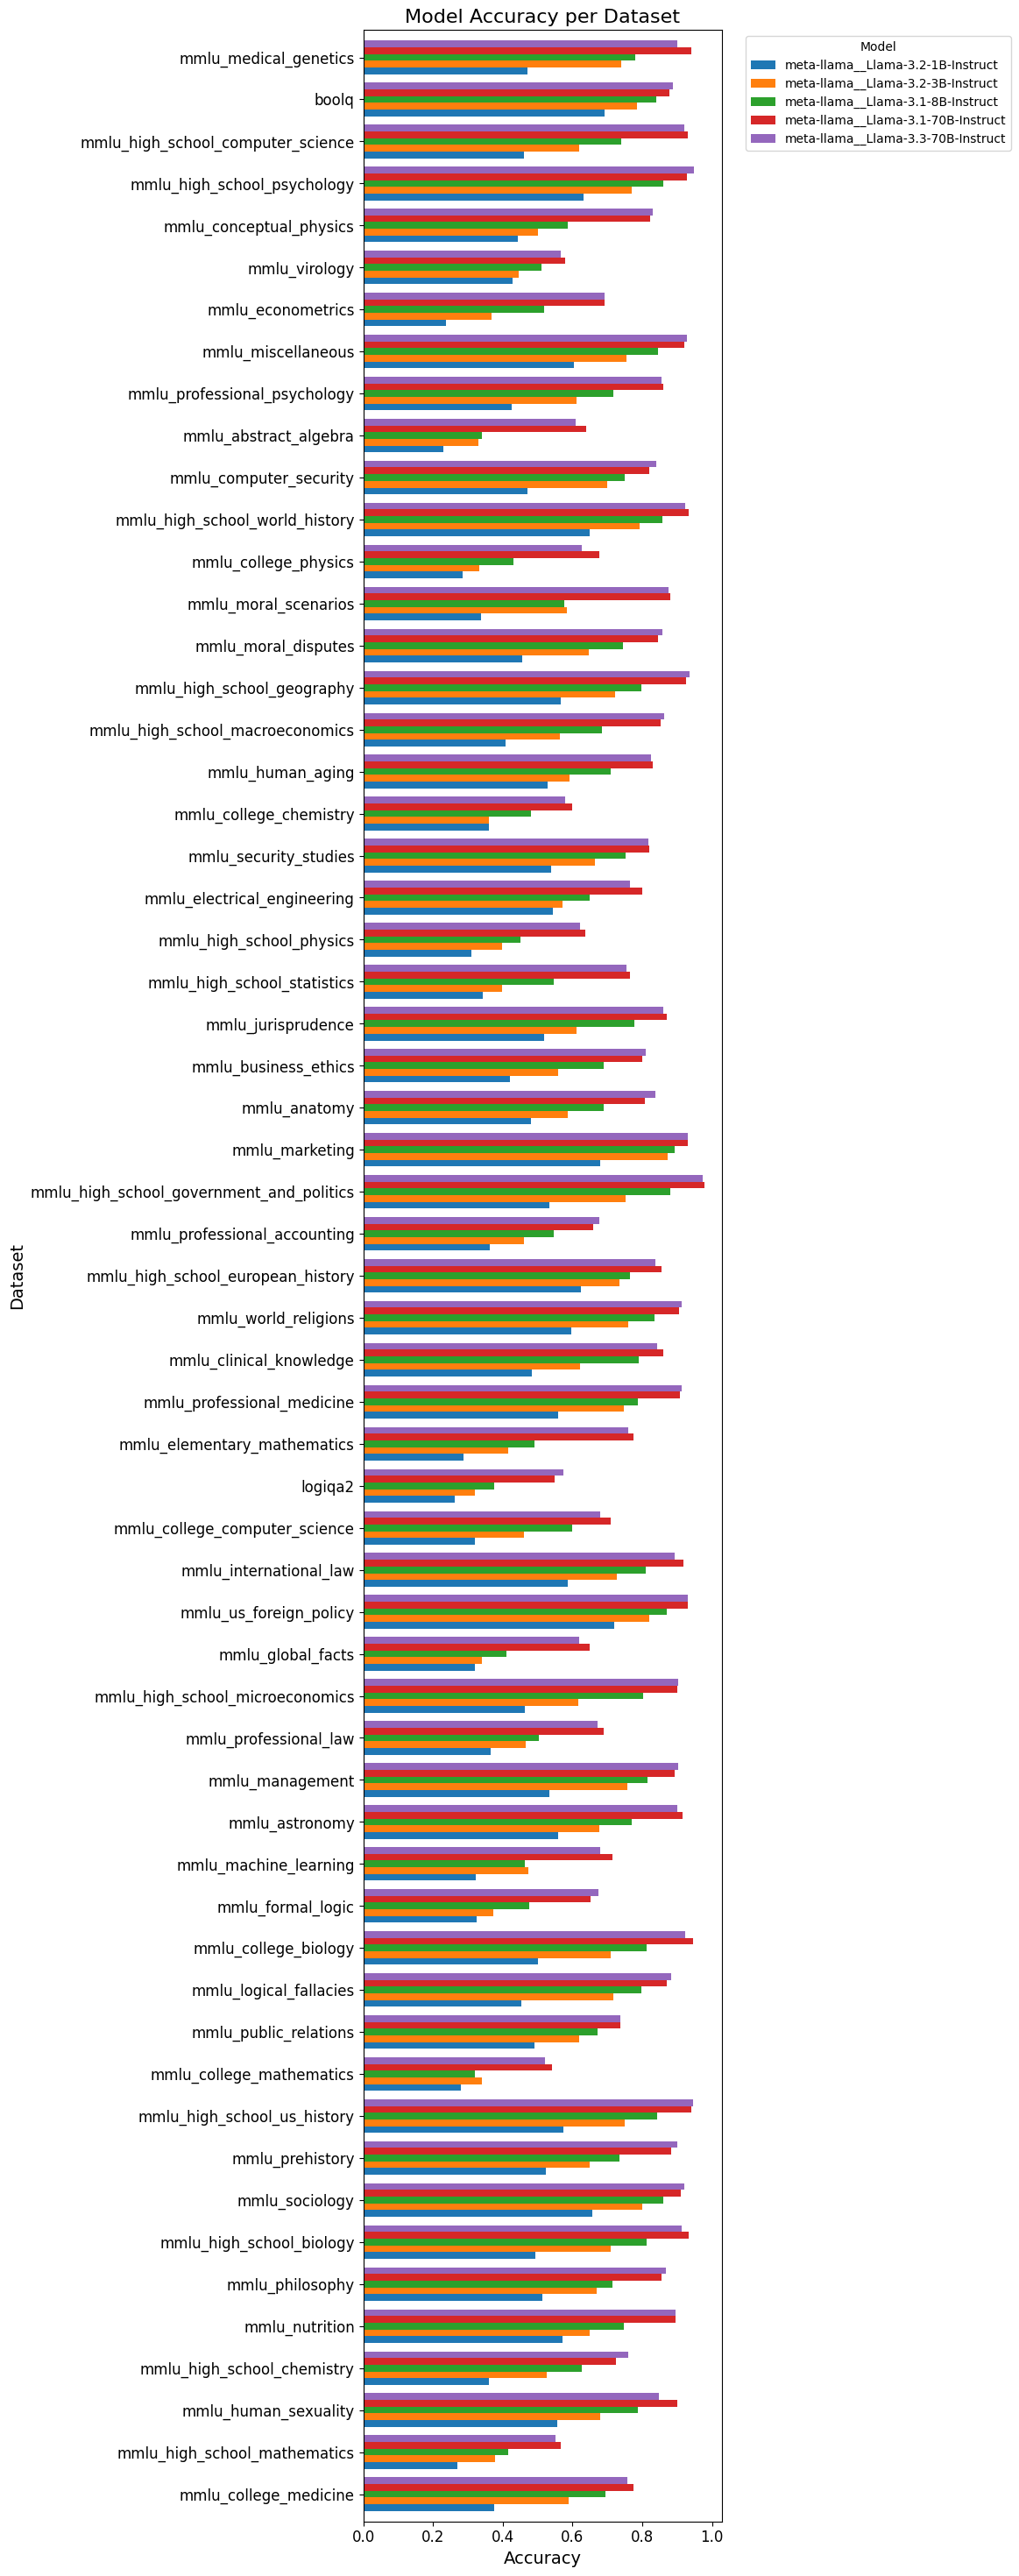

In [12]:
datasets_dir = Path("datasets")

model_order = [
    "meta-llama__Llama-3.2-1B-Instruct",
    "meta-llama__Llama-3.2-3B-Instruct",
    "meta-llama__Llama-3.1-8B-Instruct",
    "meta-llama__Llama-3.1-70B-Instruct",
    "meta-llama__Llama-3.3-70B-Instruct",
]

results = {}

for dataset_file in datasets_dir.glob("*.csv"):
    dataset_name = dataset_file.stem
    df = pd.read_csv(dataset_file)
    accuracy = df.groupby("model_name")["acc"].mean()
    results[dataset_name] = accuracy

summary_df = pd.DataFrame(results).T.fillna(0)
summary_df = summary_df[model_order]

plt.figure(figsize=(12, max(2, len(summary_df) * 0.5)))
summary_df.plot(kind="barh", figsize=(12, max(2, len(summary_df) * 0.5)), width=0.8)
plt.title("Model Accuracy per Dataset", fontsize=16)
plt.xlabel("Accuracy", fontsize=14)
plt.ylabel("Dataset", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.tight_layout()
plt.show()